# Exploratory data analysis

In [37]:
df = pd.read_csv('24StateAQI_2023.csv')
key_columns = ['AQI', 'Arithmetic Mean_TEMP', 'Arithmetic Mean_RH_DP']
df_key = df[key_columns]

# summary stats
mean = df_key.mean().round(2)
median = df_key.median().round(2)
mode = df[['AQI', 'Category', 'County Name', 'State Name']].mode().iloc[0]

print("Analysis of 2023 dataset")
print("Mean:")
for col in key_columns:
    print(f"{col.split('_')[-1]}: {mean[col]}")

print("Median:")
for col in key_columns:
    print(f"{col.split('_')[-1]}: {median[col]}")

print("Mode:")
print(f"AQI: {mode['AQI']} | Category: {mode['Category']} | County: {mode['County Name']} | State: {mode['State Name']}")



Analysis of 2023 dataset
Mean:
AQI: 69.77
TEMP: 63.4
DP: 60.25
Median:
AQI: 59.0
TEMP: 63.62
DP: 63.33
Mode:
AQI: 52 | Category: Moderate | County: Los Angeles | State: California


Findings: AQI mean 69.77 (Moderate condition), median of 59 and mode of 52, showing occasional high pollution. Temperature and pollutants show moderate variation, while SO₂ has extreme variance, suggesting outliers. Overall, the data is reliable and suitable for further analysis.

Hypothesis: Higher temperatures and lower humidity levels are strongly associated with increased AQI.

Visulization description:
The heatmap shows AQI is positively correlated with temperature (r = 0.41) and negatively correlated with humidity (r = -0.14), confirming that hot, dry conditions worsen air quality.

EDA: Loaded clean data, summarized key stats, analyzed correlations and outliers, explored temporal trends, and identified high-risk hot, dry regions. This is one factor that we can consider for our hypothesis, where it could be the case of counties that are hot and dry is higher risk of being polluted. 

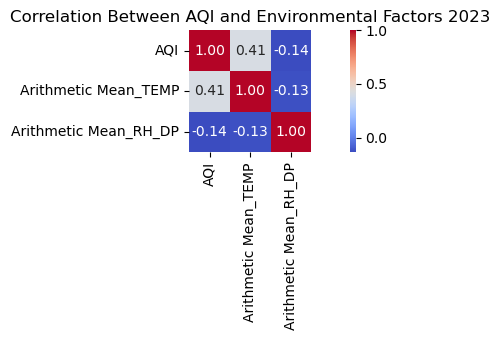

In [42]:
df = pd.read_csv('24StateAQI_2023.csv')
df['Date'] = pd.to_datetime(df['Date'])

corr_columns = [
    'AQI',
    'Arithmetic Mean_TEMP',
    'Arithmetic Mean_RH_DP',
]
corr_data = df[corr_columns].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(8,3.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Between AQI and Environmental Factors 2023')
plt.tight_layout()
plt.show()